<a href="https://colab.research.google.com/github/TSobha/FDP_CV/blob/main/DL_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Neural Network

Connect colab with drive. Mount. drive- mydrive - FDP-CV

In [1]:
import os

Change directory to the copied path

In [3]:
os.chdir('/content/drive/MyDrive/FDP-CV')

In [ ]:
Present working directory

In [4]:
pwd

'/content/drive/MyDrive/FDP-CV'

Deep neural network for classification
<br>
1 input layer, 2 hidden layers and 1 output layer

Import packages

In [5]:
import tensorflow as tf

In [6]:
mnist_data = tf.keras.datasets.mnist

Store training and testing data

In [7]:
(X_train, y_train),(X_test, y_test) = mnist_data.load_data()

11490434/11490434 [==============================] - 2s 0us/step


EDA (Exploatary Data Analysis)
<br>
Study the data

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
y_train[0]

5

For visualisation of image, we can use matplotlib

In [14]:
import matplotlib.pyplot as plt

Visualise image in X_train[0]

<function matplotlib.pyplot.show(*args, **kw)>

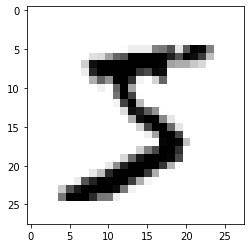

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.show

In [22]:
y_train[0]

5

In [24]:
import seaborn as sns

Annot as true to see the pixel values

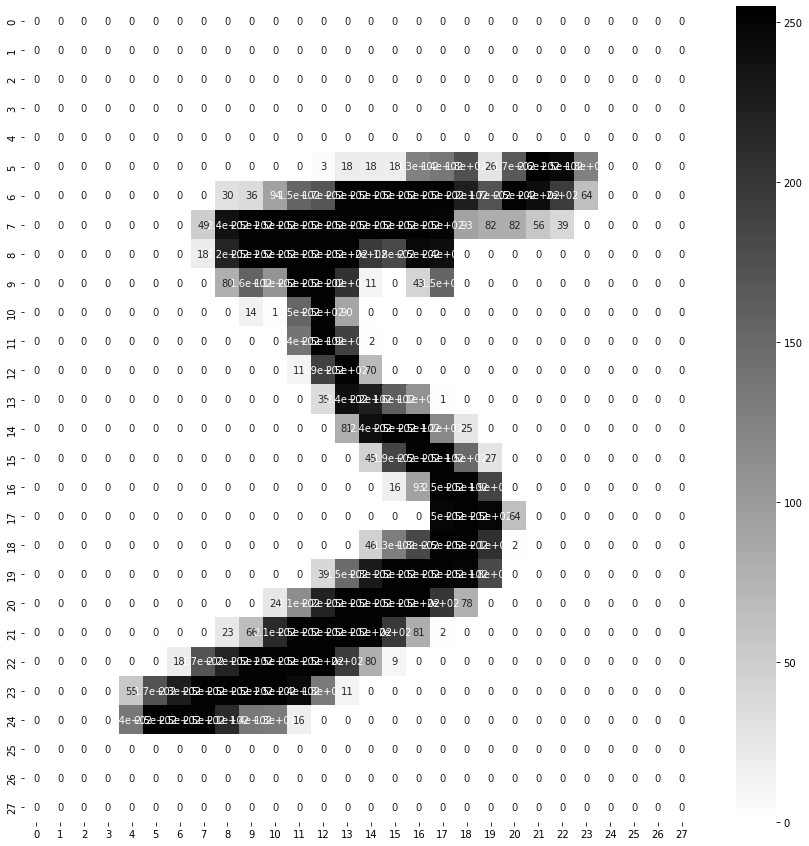

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

Normalising valuus to the range [0,1] by dividing by 255

In [26]:
X_train = X_train/255
X_test = X_test/255

Training set and Validation set during training itself
<br>
X_train = Training set + Validation set
<br>
60000 = 55000 + 5000

Splitting the array X_train upto 1st 5000 and the rest

In [27]:
X_valid, X_train = X_train [:5000], X_train [5000:]
y_valid, y_train = y_train [:5000], y_train [5000:]

In [28]:
X_train.shape

(55000, 28, 28)

Visualising after normalisation

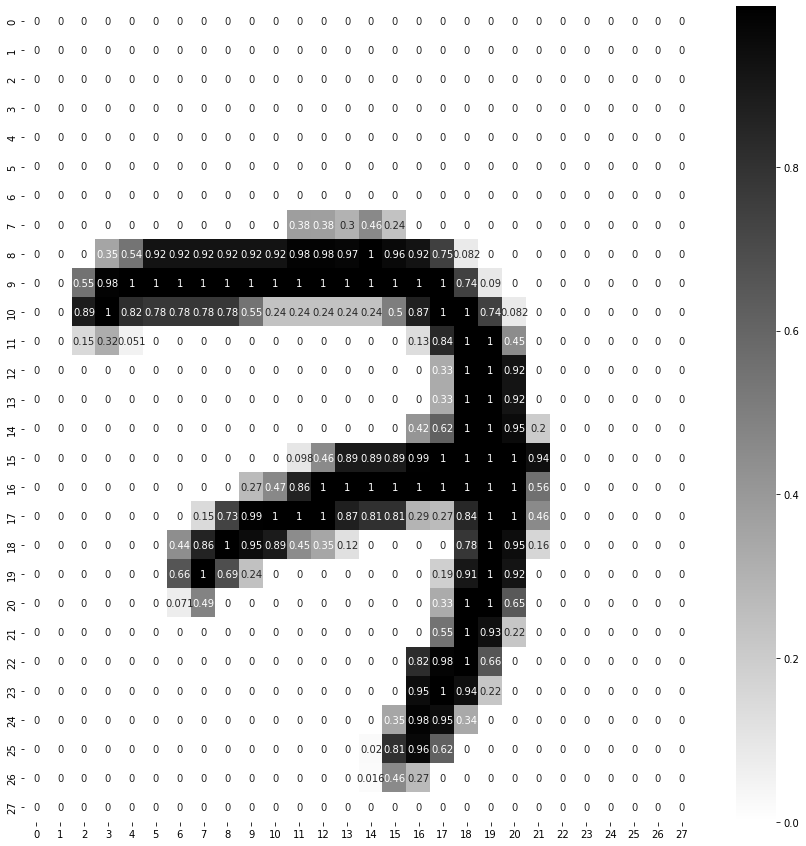

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

Hyperparameters
<br>
No of neurons in input layer 28*28
<br>
no of neurons in first hidden layer = 300
<br>
no of neurons in first second layer = 100
<br>
no of neurons in output layer = 10

In [31]:
LAYERS = [tf.keras.layers.Flatten (input_shape=[28,28], name = "inputlayer"),
          tf.keras.layers.Dense (300, activation = 'relu', name = "hiddenlayer1"),
          tf.keras.layers.Dense (100, activation = 'relu', name = "hiddenlayer2"),
          tf.keras.layers.Dense (10, activation = 'softmax', name = "outputlayer")
          ]

Create Model
<br>
Sequential model

In [32]:
model1 = tf.keras.models.Sequential (LAYERS)

In model summary
<br>
Parameters are the number of weights and bias
<br> 
Dense connection means fully connected 
<br> 
28 * 28 = 784
<br>
784 * 300 = 235200 + 300 (bias)
<br>
300 * 100 = 30000 + 100 (bias)
<br>
None is the batch size

In [33]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Set Hyper parameter
<br>
Loss funciton - Sparse Categorical Cross entropy 
<br>
for multi class classification
<br>
Optimiser - Adam, not gradient descent 

In [34]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

Compiling the model

We can design our own loss funciton
<br>
We can given more than one evaluation metrics

In [35]:
model1.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

We can access every layer

In [36]:
model1.layers

In [37]:
model1.layers[0]

In [38]:
model1.layers[0].name

'inputlayer'

In [39]:
hidden1 = model1.layers[1]

In [40]:
w,b = hidden1.get_weights()

In [41]:
w # weight (initial weights)

array([[-0.05298884, -0.07061071, -0.05815501, ...,  0.0739332 ,
        -0.02955786,  0.05365245],
       [ 0.07077226, -0.0552278 , -0.04288378, ...,  0.02814396,
        -0.02708491, -0.00225544],
       [ 0.04798411, -0.00825376,  0.0592946 , ..., -0.068305  ,
         0.03409749,  0.05707958],
       ...,
       [ 0.05602595,  0.04156533,  0.01183922, ..., -0.06713317,
        -0.02402344,  0.01154679],
       [ 0.06772676,  0.07322635,  0.04471908, ...,  0.07364087,
        -0.00106088, -0.04511127],
       [-0.01838334,  0.03486088, -0.02358171, ...,  0.02531169,
         0.0590241 ,  0.06999104]], dtype=float32)

In [42]:
b # Initially bias = 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Before training the network
<br>
Mention number of epochs or forward passes and backward passes
<br>
Also specify the validation set

In [57]:
EPOCHS = 15
VALIDATION_SET = (X_valid, y_valid)

Train the network

In [58]:
history =  model1.fit (X_train, y_train, epochs = EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0729 - val_accuracy: 0.9818
Epoch 2/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0805 - val_accuracy: 0.9808
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0814 - val_accuracy: 0.9812
Epoch 4/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0866 - val_accuracy: 0.9818
Epoch 5/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0807 - val_accuracy: 0.9826
Epoch 6/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.1028 - val_accuracy: 0.9816
Epoch 7/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.1001 - val_accuracy:

Loss is the error in classification 
<br>
Accuracy is how much number of images we can correctly identify
<br>
3ms/step <br>
loss: 0.0354 <br>
accuracy: 0.9344 <br>
val_loss: 0.1065 Validation loss<br>
val_accuracy: 0.9664 Validation accuracy<br> <br>

As accuracy increases, loss decreases.<br>
During training we are adjusting the weights and bias <br>
During validation, we test the data with an image <br>


In [ ]:
# model1.save('filename')

Prediction
<br>
First index in the array gives the probability for the input being 0 <br>
Second index in the array gives a probability for the input being 1

In [59]:
prediction = model1.predict ( X_test[0:2])
prediction = model1.predict ( X_test[0])

1/1 [==============================] - 0s 13ms/step


In [60]:
prediction

array([[3.2418493e-22, 1.5410172e-13, 2.0492931e-15, 1.6249173e-14,
        1.7208886e-19, 9.9760478e-21, 1.2774494e-30, 1.0000000e+00,
        2.2779729e-19, 6.6693991e-11]], dtype=float32)

In [61]:
import numpy as np  # numerical py

argmax() Returns the index of the maximum value 

In [62]:
np.argmax(prediction)

7

Checking the value of y_test[0]

In [63]:
y_test[0]

7

Testing the entire values of the network <br>
Probabilty values of every image

In [64]:
model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[3.2418369e-22, 1.5410202e-13, 2.0492931e-15, ..., 1.0000000e+00,
        2.2779642e-19, 6.6693859e-11],
       [2.1414017e-35, 2.0278018e-20, 1.0000000e+00, ..., 1.8806572e-32,
        7.8863983e-23, 0.0000000e+00],
       [8.5975001e-20, 1.0000000e+00, 1.2699947e-13, ..., 2.4353487e-13,
        4.6941123e-14, 1.6935247e-18],
       ...,
       [2.8654100e-30, 4.2691871e-23, 2.3688453e-25, ..., 4.3562454e-16,
        2.3739908e-19, 1.2791721e-13],
       [1.5969350e-30, 4.7205156e-30, 1.0297459e-30, ..., 2.2554228e-26,
        1.6506499e-19, 1.0137998e-24],
       [9.9204817e-30, 1.6290531e-30, 1.5738963e-26, ..., 0.0000000e+00,
        1.5693835e-24, 4.2231863e-30]], dtype=float32)

In [65]:
test_accuracy = model1.evaluate(X_test, y_test)
#  loss: 0.0835 - accuracy: 0.9749

313/313 [==============================] - 1s 3ms/step - loss: 0.1378 - accuracy: 0.9800
